In [1]:
import numpy as np
from scipy import linalg
from scipy import integrate
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from operators import *


In [2]:
x = Coordinate(np.linspace(0, 1, 11))
lap = Laplace(x)
grad = Grad(x)

u = x**2
set_ghost(u, kind=2)

# print(x, u, grad(u), lap(u), sep='\n')

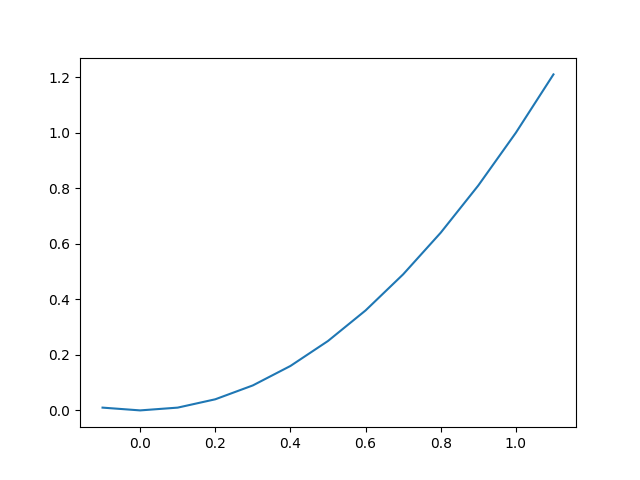

In [3]:
%matplotlib widget
# func_plot1D(
#     x,
#     [u, grad(u)],
#     scatter=True,
# )
plt.plot(x,u)

100%|██████████| 100/100 [00:00<00:00, 425.53it/s]


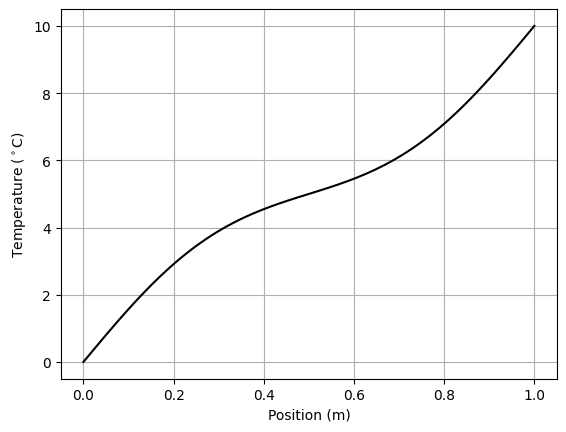

In [4]:
%matplotlib inline
#  Import numpy and the ODE solver from Scipy
# import numpy as np
from scipy.integrate import solve_ivp
need content

#  Import plotting functionality
# import matplotlib.pyplot as plt


def diffusion(T, t, D, N, L, Tl, Tr):

    #  Calculate spacing between points
    delta = float(L) / float(N)
    with tqdm(total=N) as timer:

        def equations(t, T):
            #  Boundary conditions set explicitly.  This is probably redundant
            #  as these numbers are set before the function is called and the
            #  code takes the time derivative at these points to be zero, but
            #  we'll ensure the proper boundary conditions anyway.
            T[0] = Tl
            T[-1] = Tr

            #  Initialize time derivative vector
            Tprime = np.zeros((N))

            #  We are being lazy and forcing the temperature of the boundaries
            #  not to change by setting the derivative to zero at those points
            Tprime[0] = 0.0
            Tprime[-1] = 0.0

            #  Implement the diffusion equation in the interior points using the
            #  central difference formula.  This can be vectorized for better
            #  performance, but I am just using a loop here.
            # print(t,timer.n)
            if timer.n < t / (3/100):
                timer.update()
                
            # time.sleep(0.01)
            for i in range(1, N - 1):
                Tprime[i] = D * (T[i + 1] - 2 * T[i] + T[i - 1]) / delta**2

            return Tprime

        #  Solve the equation by calling solve_ivp and return the solution
        sol = solve_ivp(
            equations,
            [tspan[0], tspan[-1]],
            T,
            t_eval=tspan,
        )
    return sol


#  Divide the rod into N points, 100 in this case
N = 100
L = 1     #  Rod length
D = 0.01     #  Diffusion coefficient
Tl = 0.     #  Left-hand boundary condition
Tr = 10.0     #  Right-hand boundary condition

#  We are interested in t = 2 to 2 = 2 seconds
tspan = np.linspace(0, 3, 100)

#  Initial conditions
T = 5.0 * np.ones((N))

#  These are the boundary conditions.
T[0] = Tl
T[-1] = Tr

#  Solve the problem by calling our function which invokes the solver
sol = diffusion(T, tspan, D, N, L, Tl, Tr)

#  Plot the solution
plt.plot(np.linspace(0, 1, N), sol.y[:, -1], 'k')
plt.xlabel('Position (m)')
plt.ylabel('Temperature ($^\circ$C)')
plt.grid(True)
plt.show()

In [5]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


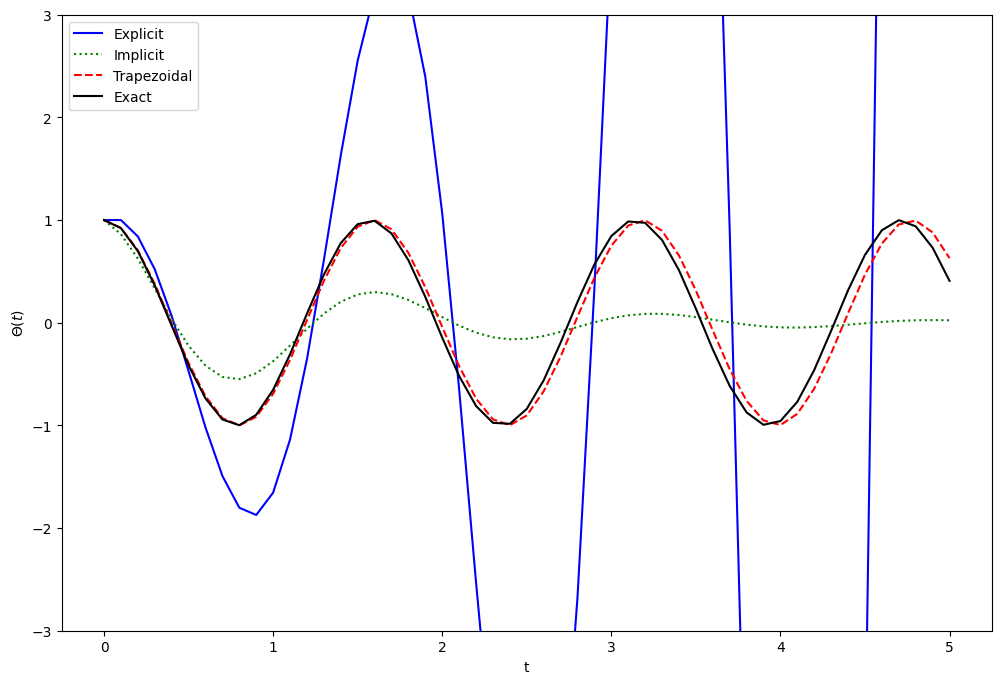

In [9]:
# %matplotlib inline
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([
    [1],
    [0],
])

m_e = np.array([
    [1, h],
    [-w**2 * h, 1],
])
m_i = inv(np.array([
    [1, -h],
    [w**2 * h, 1],
]))
m_t = np.dot(
    inv(np.array([
        [1, -h / 2],
        [w**2 * h / 2, 1],
    ])),
    np.array([
        [1, h / 2],
        [-w**2 * h / 2, 1],
    ]),
)

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t) - 1):
    s_e[j + 1, :] = np.dot(m_e, s_e[j, :])
    s_i[j + 1, :] = np.dot(m_i, s_i[j, :])
    s_t[j + 1, :] = np.dot(m_t, s_t[j, :])

plt.figure(figsize=(12, 8))
plt.plot(t, s_e[:, 0], 'b-')
plt.plot(t, s_i[:, 0], 'g:')
plt.plot(t, s_t[:, 0], 'r--')
plt.plot(t, np.cos(w * t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])


In [12]:
print(m_e, m_i, m_t, sep='\n\n')


[[ 1.   0.1]
 [-1.6  1. ]]

[[ 0.86206897  0.0862069 ]
 [-1.37931034  0.86206897]]

[[ 0.92307692  0.09615385]
 [-1.53846154  0.92307692]]
